In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
import collections
from scipy.spatial import distance

In [2]:
value1 = np.random.normal(loc=5,scale=25,size=10000)
value2 =  np.random.normal(loc=175,scale=50,size=10000)
value3 =  np.random.normal(loc=500,scale=75,size=10000)
q1 = np.concatenate((value1,value2,value3))


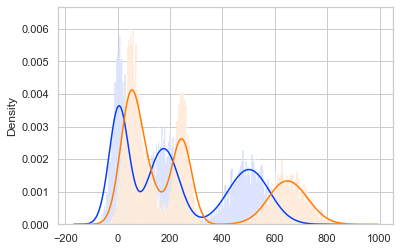

In [3]:
value1 = np.random.normal(loc=90,scale=45,size=10000)
value2 =  np.random.normal(loc=245,scale=25,size=10000)
value3 =  np.random.normal(loc=650,scale=69,size=10000)
value4 =  np.random.normal(loc=45,scale=23,size=10000)
q2 = np.concatenate((value1,value2,value3,value4))
sns.distplot(q1,bins=1000)
sns.distplot(q2,bins=1000)
plt.show()

In [4]:

lowest_bic = np.infty
bic = []
n_components_range = range(1, 8)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        q1 = np.asarray(q1)
        q1 =q1.reshape(-1,1)
        gmm.fit(q1)
        bic.append(gmm.bic(q1))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmmq1 = gmm
            
lowest_bic = np.infty
bic = []
n_components_range = range(1, 8)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        q2 = np.asarray(q2)
        q2 =q2.reshape(-1,1)
        gmm.fit(q2)
        bic.append(gmm.bic(q2))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmmq2 = gmm
    

In [5]:
mins = min(best_gmmq1.n_components,best_gmmq2.n_components)
if best_gmmq1.n_components > best_gmmq2.n_components:
    lowest_bic = np.infty
    bic = []
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=mins,
                                          covariance_type=cv_type)
        q1 = np.asarray(q1)
        q1 =q1.reshape(-1,1)
        gmm.fit(q1)
        bic.append(gmm.bic(q1))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmmq1 = gmm
else:
    lowest_bic = np.infty
    bic = []
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=mins,
                                          covariance_type=cv_type)
        q2 = np.asarray(q2)
        q2 =q2.reshape(-1,1)
        gmm.fit(q2)
        bic.append(gmm.bic(q2))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmmq2 = gmm

In [6]:
print(best_gmmq1.get_params())
print(best_gmmq2.get_params())
print(best_gmmq1.weights_)
print(best_gmmq2.weights_)
print(best_gmmq1.means_)
#print(mean1)
print(best_gmmq2.means_)
#print(mean2)
print(best_gmmq1.covariances_)
print(best_gmmq2.covariances_)

{'covariance_type': 'spherical', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 3, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}
{'covariance_type': 'diag', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 3, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}
[0.33509834 0.33331751 0.33158416]
[0.25994576 0.24998753 0.49006671]
[[  5.19264571]
 [499.76777811]
 [175.90555691]]
[[242.47425125]
 [650.58122784]
 [ 64.76799067]]
[ 642.00267501 5514.90910439 2442.49230745]
[[ 752.12126771]
 [4709.42893441]
 [1508.86240556]]


<AxesSubplot:ylabel='Density'>

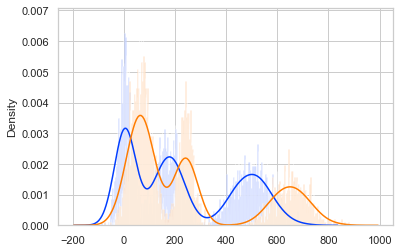

In [7]:
r1,_=best_gmmq1.sample(10000)
sns.distplot(r1,bins=1000)
r2,_=best_gmmq2.sample(10000)
sns.distplot(r2,bins=1000)

In [8]:
print(best_gmmq1.score(r1))
best_gmmq2.score(r2)

-6.302742212414589


-6.17038291126016

In [9]:
print(best_gmmq1.get_params())
print(best_gmmq2.get_params())
print(best_gmmq1.weights_)
print(best_gmmq2.weights_)
print(best_gmmq1.means_)
#print(mean1)
print(best_gmmq2.means_)
#print(mean2)

{'covariance_type': 'spherical', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 3, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}
{'covariance_type': 'diag', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 3, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}
[0.33509834 0.33331751 0.33158416]
[0.25994576 0.24998753 0.49006671]
[[  5.19264571]
 [499.76777811]
 [175.90555691]]
[[242.47425125]
 [650.58122784]
 [ 64.76799067]]


In [31]:
means=[]
for i in range(len(best_gmmq1.means_)):
    means.append(best_gmmq1.means_[i][0])
means

[5.192645712312085, 499.7677781078227, 175.90555691105607]

In [34]:
x = dict(zip(means,best_gmmq1.weights_))
od1 = collections.OrderedDict(sorted(x.items(),reverse=True))
od1

OrderedDict([(499.7677781078227, 0.333317505457715),
             (175.90555691105607, 0.33158415781089823),
             (5.192645712312085, 0.3350983367313777)])

In [38]:
means=[]
for i in range(len(best_gmmq2.means_)):
    means.append(best_gmmq2.means_[i][0])
means

[242.4742512497811, 650.5812278369369, 64.76799067284479]

In [39]:
x = dict(zip(means,best_gmmq2.weights_))
od2 = collections.OrderedDict(sorted(x.items(),reverse=True))
od2

OrderedDict([(650.5812278369369, 0.24998752958087808),
             (242.4742512497811, 0.25994575851879403),
             (64.76799067284479, 0.49006671190033346)])

In [49]:
minsize=min(len(od1),len(od2))
od1 = dict(od1).items()
od1 = list(od1)[:minsize]
od2 = dict(od2).items()
od2 = list(od2)[:minsize]
od2

[(650.5812278369369, 0.24998752958087808),
 (242.4742512497811, 0.25994575851879403),
 (64.76799067284479, 0.49006671190033346)]

In [52]:
odw=[]
odm=[]
for i in range(len(od1)):
    odm.append(abs(od1[i][0] - od2[i][0]))
    odw.append(abs(od1[i][1] - od2[i][1]))
    

In [56]:
odw

[0.08332997587683691, 0.0716383992921042, 0.15496837516895579]

In [57]:
odm

[150.8134497291142, 66.56869433872504, 59.5753449605327]

Manhattan

In [59]:
dmm = list(zip(odm,odw))
dmm

[(150.8134497291142, 0.08332997587683691),
 (66.56869433872504, 0.0716383992921042),
 (59.5753449605327, 0.15496837516895579)]

In [ ]:
#Recalculation 
(0.003890734620188796, 40.18229975869491),
 (0.07746131132774492, 257.15852799431724),
 (0.08271556852881734, 475.730259847692)

In [ ]:
#Snipping
[(0.15573441997690457, 59.835426796165954),
 (0.07468192969168752, 256.1813654055088),
 (0.0810524902852065, 475.8826765223812)]

In [34]:
odw=[]
odm=[]
for i in range(len(od1)):
    odw.append(np.sqrt((od1[i][0] - od2[i][0])**2))
    odm.append(np.sqrt((od1[i][1][0] - od2[i][1][0])**2))
print(odw)
print(odm)

[0.15573441997690457, 0.07468192969168752, 0.0810524902852065]
[59.835426796165954, 256.1813654055088, 475.8826765223812]


Euclidean

In [35]:
dme = list(zip(odw,odm))
dme

[(0.15573441997690457, 59.835426796165954),
 (0.07468192969168752, 256.1813654055088),
 (0.0810524902852065, 475.8826765223812)]

Manhattan

In [32]:
distm = abs(odd1-odd2)
distm

array([ 30.18287449, 103.69937957, 104.8022087 ])

Euclidean

In [33]:
dist = np.sqrt(abs((odd1)**2 - (odd2)**2))
dist

array([ 31.90065628, 154.32782825, 152.0381114 ])

In [ ]:
[166.31412156,  61.9865077 , 151.74439034]